1 - LIBRARIES IMPORT

In [2]:
#Importing Libraries#

import pandas as pd
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.decomposition import PCA

2 - DATA IMPORT, ANALYSIS AND WRANGLING

In [3]:
#Importing Data#

df_raw = pd.DataFrame(pd.read_csv('Mall_Customers.csv'))

In [4]:
#Dataset Shape#

df_raw.shape

(200, 5)

In [5]:
#Dataset Preview#

df_raw.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
#Feature Types#

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
#Correlation Matrix#

corr = df_raw.corr()
corr.style.background_gradient(cmap='coolwarm')

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [8]:
#Droping Customer ID from table#

df_raw = df_raw.drop(columns=['CustomerID'])
df_raw.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


3 - PRE-PROCESSING

In [9]:
#1ST MODEL: Preparing data for 2 axis Cluster (With only quantitative/continuous features)#

df_2dim = df_raw.drop(columns=['Age','Gender'])
df_2dim.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [10]:
#2nd MODEL: Preparing data for 3 axis Cluster (With 2 quantitative/continuous and 1 quantitative/categorical features)#

df_3dim = df_raw.drop(columns=['Gender'])
df_3dim.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [11]:
#3rd MODEL: Preparing data for 2 axis Cluster (With dimensionality reduction/PCA)#

    #Enconding categorical features
df_dummies = df_raw.drop(columns=['Gender'])
df_dummies.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [12]:
#Scaling Features#
scaler = StandardScaler()

    #Scale for 1st model (2 axis)
df_2dim_scaled = scaler.fit_transform(df_2dim)
df_2dim_scaled

    #Scale for 2nd model (3 axis)
df_3dim_scaled = scaler.fit_transform(df_2dim)
df_3dim_scaled

    #Scale for 3rd model (2 axis with PCA)
df_dummies_scaled = scaler.fit_transform(df_dummies)
df_dummies_scaled

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [13]:
    #Setting 2 components (expecting to be used as axis)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_dummies_scaled)
df_pca_raw = pd.DataFrame(data=principalComponents,columns=['pc1','pc2'])
df_pca_raw

,pc1,pc2
0,-0.615720,-1.763481
1,-1.665793,-1.820747
2,0.337862,-1.674799
3,-1.456573,-1.772430
4,-0.038465,-1.662740
...,...,...
195,-1.093705,2.215577
196,0.800448,2.540748
197,-1.119709,2.445169
198,0.395411,2.946665


In [14]:
pca.explained_variance_ratio_

array([0.44266167, 0.33308378])

C:\Users\Caio e Rafah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Caio e Rafah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Caio e Rafah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


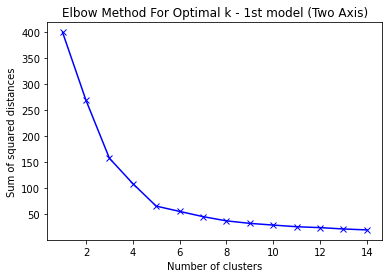

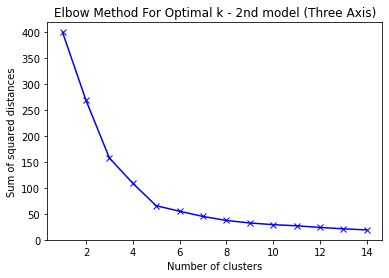

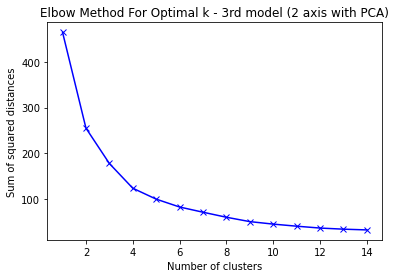

In [15]:
#Definig the optimal number of clusters trough Elbow Method

#Function to generate graph for each model#

    #Function for 1st model (2 axis)
squared_distances_2dim = []
K = range(1,15) #min, max-1 number of clusters on graph
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_2dim_scaled)
    squared_distances_2dim.append(km.inertia_)
    
    #Function for 2nd model (3 axis)
squared_distances_3dim = []
K = range(1,15) #min, max-1 number of clusters on graph
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_3dim_scaled)
    squared_distances_3dim.append(km.inertia_)
    
    #Function for 3rd model (2 axis with PCA)
squared_distances_pca = []
K = range(1,15) #min, max-1 number of clusters on graph
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_pca_raw)
    squared_distances_pca.append(km.inertia_)

    
#Graphical visualization of Elbow Method (numer of cluster vs sum of squared distances) for each model#

    #Graphic for 1st model (2 axis)
plt.plot(K, squared_distances_2dim, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k - 1st model (Two Axis)')
plt.show()

    #Graphic for 2nd model (3 axis)
plt.plot(K, squared_distances_3dim, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k - 2nd model (Three Axis)')
plt.show()

    #Graphic for 3rd model (2 axis with PCA)
plt.plot(K, squared_distances_pca, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k - 3rd model (2 axis with PCA)')
plt.show()


4 - ML Model

In [18]:
#Fit and predict#

    #Fit and predict for 1st model (2 axis)
kmeanModel_2dim = KMeans(n_clusters=8)
kmeanModel_2dim.fit(df_2dim_scaled)
predict_2dim = kmeanModel_2dim.predict(df_2dim_scaled)

    #Fit and predict for 2nd model (3 axis)
kmeanModel_3dim = KMeans(n_clusters=8)
kmeanModel_3dim.fit(df_3dim_scaled)
predict_3dim = kmeanModel_3dim.predict(df_3dim_scaled)

    #Fit and predict for 3rd model (2 axis with PCA)
kmeanModel_pca = KMeans(n_clusters=6)
kmeanModel_pca.fit(df_pca_raw)
predict_pca = kmeanModel_pca.predict(df_pca_raw)

In [19]:
#Appending cluster number to dataset#

    #Appending cluster number for 1st model (2 axis)    
df_2dim['cluster'] = pd.Series(predict_2dim, index=df_raw.index)

    #Appending cluster number for 2nd model (3 axis)    
df_3dim['cluster'] = pd.Series(predict_3dim, index=df_raw.index)

    #Appending cluster number for 3rd model (2 axis with PCA)    
df_pca_raw['cluster'] = pd.Series(predict_pca, index=df_raw.index)

print(df_2dim, df_3dim)

     Annual Income (k$)  Spending Score (1-100)  cluster
0                    15                      39        2
1                    15                      81        5
2                    16                       6        2
3                    16                      77        5
4                    17                      40        2
..                  ...                     ...      ...
195                 120                      79        7
196                 126                      28        6
197                 126                      74        7
198                 137                      18        6
199                 137                      83        7

[200 rows x 3 columns]      Age  Annual Income (k$)  Spending Score (1-100)  cluster
0     19                  15                      39        4
1     21                  15                      81        2
2     20                  16                       6        4
3     23                  16                

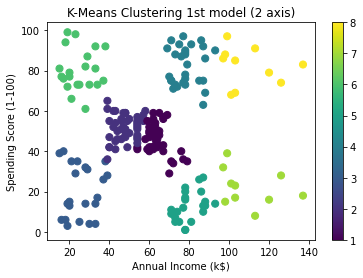

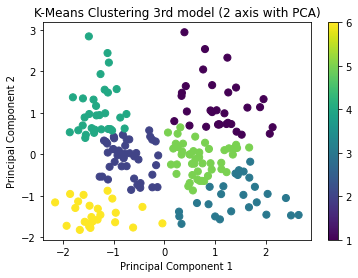

In [21]:
#Printing scatterplot graphics for each model#

    #Printing scatterplot graphics for 1st model (2 axis)  
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df_2dim['Annual Income (k$)'],df_2dim['Spending Score (1-100)'],
                     c=df_2dim['cluster']+1,s=50)
ax.set_title('K-Means Clustering 1st model (2 axis)')
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
plt.colorbar(scatter)

    #Printing scatterplot graphics for 3rd model (2 axis with PCA)  
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df_pca_raw['pc1'],df_pca_raw['pc2'],
                     c=df_pca_raw['cluster']+1,s=50)
ax.set_title('K-Means Clustering 3rd model (2 axis with PCA)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
plt.colorbar(scatter)


    #Printing scatterplot graphics for 2nd model (3 axis)  
PLOT = go.Figure()
for C in list(df_3dim.cluster.unique()):
    
    PLOT.add_trace(go.Scatter3d(x = df_3dim[df_3dim.cluster == C]['Annual Income (k$)'],
                                y = df_3dim[df_3dim.cluster == C]['Spending Score (1-100)'],
                                z = df_3dim[df_3dim.cluster == C]['Age'],
                                mode = 'markers', marker_size = 6, marker_line_width = 0,
                                name = 'Cluster ' + str(C+1)))


PLOT.update_layout(width = 600, height = 600, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Annual Income', titlefont_color = 'black'),
                                yaxis=dict(title = 'Age', titlefont_color = 'black'),
                                zaxis=dict(title = 'Spending Score', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))